# Developing  Recommender System for a Movie Platform
# Business Problem

Developing a user-based recommender system for a movie streaming platform or an online movie rental service. The goal is to provide personalized movie recommendation system to users based on their viewing history, ratings , as well as the preferences of similar users.

# Business Understanding:

In the realm of movie streaming or rental platforms, users often face the challenge of discovering new movies that resonate with their interests. This poses a significant barrier to user engagement and satisfaction. By implementing a user-based recommender system, the platform aims to address this issue by offering tailored movie suggestions. These recommendations will be based on a user's past viewing history,ratings, preferences, and the behaviors of similar users. Ultimately, the platform seeks to elevate the user experience, leading to higher satisfaction levels, improved retention rates, and potentially increased revenue through enhanced user engagement and movie consumption..


# Data Understanding
The datasets contains  information such as user IDs, movie IDs, ratings, and timestamps. The dataset is typically split into multiple files, including ratings.csv, movies.csv, links.csv, and tags.csv, each providing different aspects of movie-related data. The columns are described as:
-User ID: A unique identifier for each user who rated the movies.
- Movie ID: A unique identifier for each movie being rated.
- Rating: The numerical rating given by the user for the movie on a scale of 1 to 5
- Timestamp: The timestamp indicating when the rating was provided.
- Title: The title of the movie.
- Genres: The genre(s) or category associated with the movie.
- IMDb ID: The identifier of the movie on the IMDb (Internet Movie Database) website.
- Tag: The actual tag or keyword assigned by the user.



# Study Objectives

1.	Developing a user-based recommender system for a movie streaming platform or an online movie rental service.


2.	Providing personalized movie recommendations to users based on their viewing history and preferences, as well as the preferences of similar users.


3.	Enhancing the user experience by suggesting relevant and engaging movies tailored to each user's tastes.


4.	Increasing user satisfaction, retention, and potentially higher revenue through improved engagement and movie consumption.


To achieve our objectives we will:

- Come up with a memory based recommendation system i.e both user based and item based

- Build a recommendation system using model based collaborative filtering with Singular Vector Decomposition, Non Matrix Factorization and Neural Networks and compare model performance


# Data Preparation

We will start by importing the relevant libraries and viewing what is in our datasets

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

In [2]:
# loading the 'movies' dataset
df1=pd.read_csv('movies.csv')

# checking attribute of a DataFrame 
print(df1.shape)

# displaying the first five rows 
df1.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# loading the ratings dataset
df2=pd.read_csv('ratings.csv')

# cheking attributes of the dataset
print(df2.shape)

# displaying the first five rows 
df2.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# loading 'tags' dataset
df3=pd.read_csv('tags.csv')

# checking the attributes of the dataset
print(df3.shape)

# displaying first five rows
df3.tail(5)

(3683, 4)


,userId,movieId,tag,timestamp
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978
3682,610,168248,Heroic Bloodshed,1493844270


In [5]:
# loading the 'links' dataset
df4=pd.read_csv('links.csv')

# checking the attributes of the dataset
print(df4.shape)

# displaying first five rows
df4.head()

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
print(df1.columns)
print (df2.columns)
print(df3.columns)
print(df4.columns)

Index(['movieId', 'title', 'genres'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


In [7]:
# assining df1 and df2
movies_df= df1
ratings_df=df2

In [8]:
#checking the movies data frame datatypes
movies_df.dtypes

movieId     int64
title      object
genres     object
dtype: object

From the datatypes we note that 'title' and 'genres' columns are type object and hence will need to change that to numeric when doing our preprocessing 

### Exploring Ratings Data Frame

In [9]:
# cheking the ratings data type
ratings_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [10]:
# checking descriptive statistics for the numerical columns 
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Rating range user provided a rating  between 0.5 and 5.0 indicating diverse opinions on the movies

The mean rating is 3.5 indicating that most users gave an average rating for the movies

UserId has the max value at 610, indicating that 610 unique users gave their opinions on the movies

## Merging Ratings and Movies DataFrames

In [11]:
# merging Movies and Rating df on movieId column
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

In [12]:
#previewing
merged_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## Creating a year column from the title column of the dataframe.

From the merged dataset above, we notice that at the end of every string in the title column is the year value ,when the movie was released. We will therefore separate it from the title and have it as a column on its own.. This we will do using a function known as split_year as shown below.

In [13]:
def split_year(df):
    """
    Splits the movie into individual words, isolates the years into their own column,
    combines the words again, removes the years value, then the list created when splitting into individual words.
    :return: DataFrame with 'title' column modified.
    """
    # Splitting the titles into individual words
    df['title'] = df['title'].apply(lambda x: x.split())

    # Extracting the years
    df['year'] = [x[-1].strip('()') for x in df['title']]

    # Joining the separate strings into one, removing the years
    df['title'] = [[' '.join(inner_list[:-1])] for inner_list in df['title']]

    # Removing the list from the 'title' column
    strings = []
    for value in df['title']:
        for string in value:
            strings.append(string)
    
    # Assigining results to the title column
    df['title'] = strings

    # Returning the modified DataFrame
    return df


In [14]:
merged_df=split_year(merged_df)
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995


Next, we will check the data type of our new created year column

In [15]:
#checking the datatypes
merged_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
year          object
dtype: object

We notice that the year column is of object data type, let's check if there are any unique values that are not numeric in the year column.

In [16]:
merged_df['year'].unique()

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '2003', '2004', '2006',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '1955', '2002', '1961', '1954', '1957', '1943', '1956', '1966',
       '2001', '1937', '1972', '2005', '1950', '2007', '2016', '1926',
       '1944', '1949', '1936', '2017', '1958', '1935', '1927', '1953',
       '2018', '1923', '1902', '1920', '1948', '1928', 'Mirror', '1934',
       '1916', '1908', '1932', '1921', '1925', '1929', '1917', 'Watson',
       '2006–2007', 'Baby', '2', '1915', '1924', '1903', 'One', '5',
    

From the code above we notice that we have some values that are strings and some other numbers that cant be years. we have to clean that by removing them, in the code below.

In [17]:

# dropping the non numeric columns
non_numeric_values = ['Paterson', 'Moonlight', 'Road', 'OA', 'Cosmos', 'Animals', 'Watson', 'Mirror', 'Baby', '2', '5','One',  '2006–2007']
merged_df = merged_df[~merged_df['year'].isin(non_numeric_values)]

Let's check to see if the vales have been cleaned.

In [18]:
merged_df['year'].unique()

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '2003', '2004', '2006',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '1955', '2002', '1961', '1954', '1957', '1943', '1956', '1966',
       '2001', '1937', '1972', '2005', '1950', '2007', '2016', '1926',
       '1944', '1949', '1936', '2017', '1958', '1935', '1927', '1953',
       '2018', '1923', '1902', '1920', '1948', '1928', '1934', '1916',
       '1908', '1932', '1921', '1925', '1929', '1917', '1915', '1924',
       '1903', '1919'], dtype=object)

From the above ouput, all the values have been cleaned

In [19]:
#changing the datatype to numeric
merged_df['year'] = merged_df['year'].apply(lambda x: int(x))

In [20]:
merged_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
year           int64
dtype: object

Now the year column is an integer.

In [21]:
#checking if there are any null values
merged_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
year         0
dtype: int64

We see that we have no null values in our dataset and hence we will proceed to performing Exploratory Data Analysis

## Checking for duplicates

In [22]:
merged_df.duplicated().sum()

0

There are no duplicates in our dataset.

## Checking for null values

In [23]:
#checking if there are any null values
merged_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
year         0
dtype: int64

We see that we have no null values in our dataset and hence we will proceed to performing Exploratory Data Analysis

In [24]:
merged_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
year           int64
dtype: object

Now the year column is an integer.

# Exploratory Data Analysis

### Relation between the age of the movie and its rating.

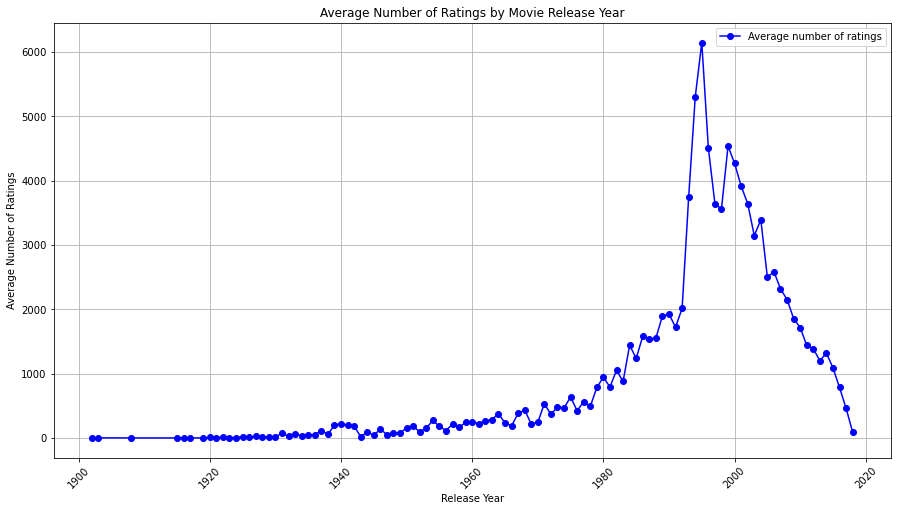

In [25]:
# Calculating the average number of ratings for movies in each release year group
average_ratings_by_year = merged_df.groupby('year')['rating'].count().reset_index()
average_ratings_by_year.columns = ['year', 'Average_Number_of_Ratings']

# Sorting the data by release year
average_ratings_by_year = average_ratings_by_year.sort_values(by='year')

# Create a line plot to visualize the trend
plt.figure(figsize=(15, 8))
plt.plot(average_ratings_by_year['year'], average_ratings_by_year['Average_Number_of_Ratings'], marker='o', color='blue', label='Average number of ratings')
plt.xlabel('Release Year')
plt.ylabel('Average Number of Ratings')
plt.title('Average Number of Ratings by Movie Release Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

From the graph above we note that the movies that were released after approximately 1995 had a higher rating in our dataset.

### Visualizing Distribution of Ratings

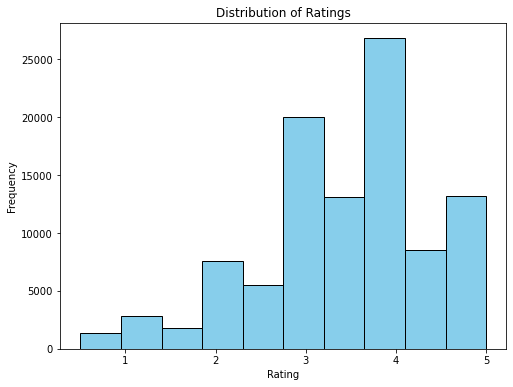

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(merged_df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

From the above, most of the movies were given a rating of 4.

### Number of Ratings per movie

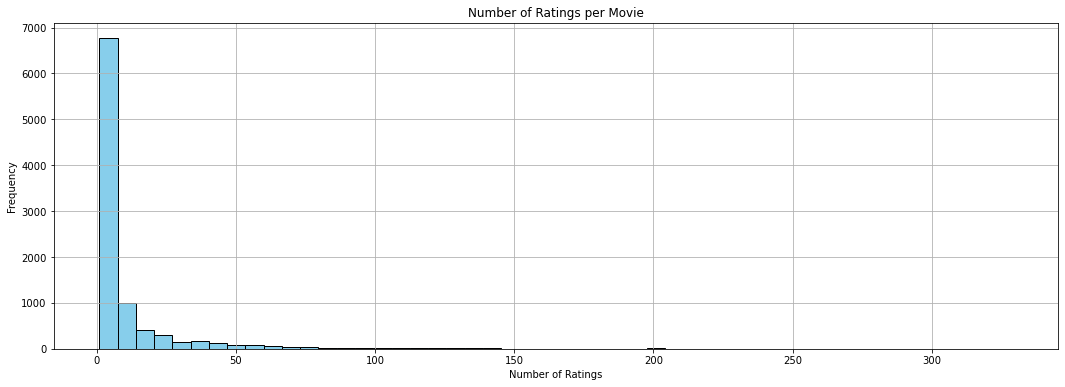

In [27]:
# computing and sorting the number of ratings 
ratings_per_movie = merged_df.groupby('title')['rating'].count().sort_values(ascending=False)

#  visualizes the distribution of the number of ratings per movie
plt.figure(figsize=(18, 6))
ratings_per_movie.hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


From the above we see that most movies received less than 150 ratings.A small number of popular movies receive a large number of ratings, while the majority receive relatively fewer ratings.

### Top Genres in the dataset

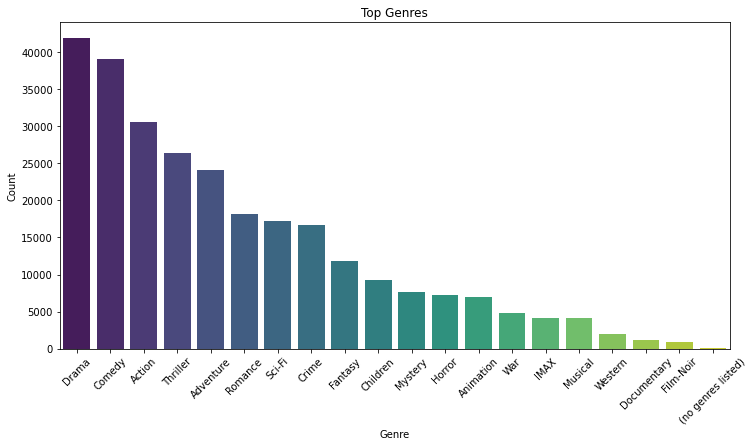

In [28]:

# Counting the occurrences of each genre
genres_count = merged_df['genres'].str.split('|', expand=True).stack().value_counts().reset_index()
genres_count.columns = ['Genre', 'Count']

#  visualizes the count of each genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genres_count, x='Genre', y='Count',  palette='viridis')
plt.title('Top Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


From the barplot we see that the common genre in our dataset is Drama, then comedy, action, thriller, Adventure, Romance, Sci-Fi, Crime, Fantasy, Children .

### Top watched movies

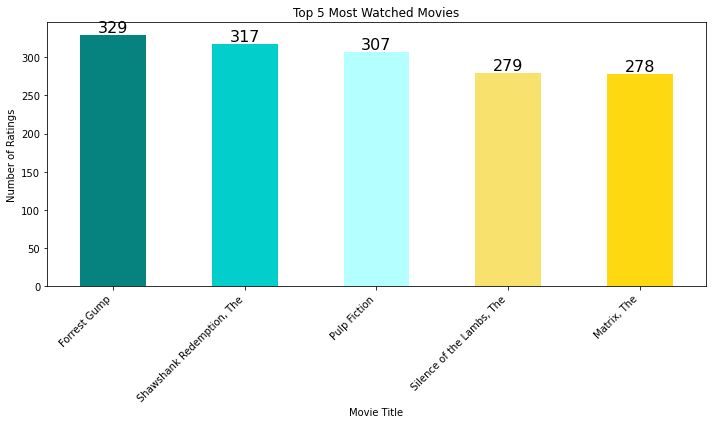

In [29]:
 # Group by movie title and count the number of ratings, then sort in descending order
top_watched_movies = merged_df.groupby('title')['rating'].count().sort_values(ascending=False).head()
# list of custom colors for the bars
custom_colors = ['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811']

# bar plot with custom colors
plt.figure(figsize=(10, 6))
ax = top_watched_movies.plot(kind='bar', color=custom_colors)
plt.title('Top 5 Most Watched Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the number of ratings on top of each bar
for i, v in enumerate(top_watched_movies):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=16, color='black')

plt.show()

From the above the most watched movie is 'Forrest Gump(1994)'

### Highly Rated movies

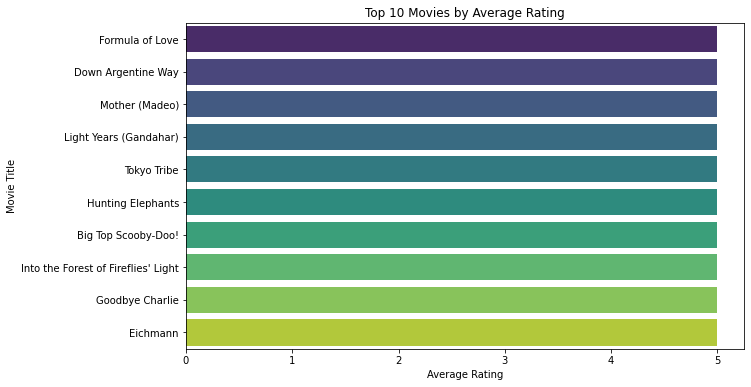

In [30]:
# the average rating for each movie
average_ratings = merged_df.groupby('title')['rating'].mean().reset_index()

# Rename the columns
average_ratings.columns = ['title', 'avg_rating']

# Sort the movies by average rating in descending order
average_ratings = average_ratings.sort_values(by='avg_rating', ascending=False)

# bar plot to visualize the top 10 movies by average rating
plt.figure(figsize=(10, 6))
sns.barplot(x="avg_rating", y="title", data=round(average_ratings.head(10), 2), palette="viridis")
plt.title("Top 10 Movies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

The above plot shows the highly rated movie, with a rating of 5. Which could indicate the most liked movies by our audience.

# Modelling

## Memory Based Collaborative Filtering

Here we will focus on user based and item based models to make predictions

## Model: User-based Recommender System
A user-based recommender system is a type of collaborative filtering technique that makes recommendations based on similarities between users. The steps to be followed in the process are as follows:

1. User Similarity Calculation: This will involve calculating the pairwise similarity between users based on their rating patterns. Similarity measures to be calculated include; Pearson correlation coefficient.

2. Neighborhood Formation: This will entail identifying, for each user, a set of similar users (neighbors) based on the calculated similarities. The neighborhood size will be determined by setting a threshold or selecting the top-k most similar users.

3. Prediction and Recommendation:  This will involve predicting,  for a given user, the rating for an unseen movie by aggregating the ratings of that movie from the user's neighbors. Aggregation techniques to be adopted include; weighted average, mean. Out of this, recommendation will be done for the movies with the highest predicted ratings to the user.


## Developing User-Movie Matrix

We'll convert the dataset into a matrix structure where the rows represent users and the columns represent movies. Each cell in the matrix indicates the user's rating for a specific movie, with 'NaN' denoting missing ratings.

In [31]:
# Create user-item matrix
movie_matrix = merged_df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Normalizing the Data

Due to variations in rating tendencies among individuals, we employ normalization by calculating the average rating provided by each user.

Following normalization, movies rated below a user's average rating are assigned a negative value, while movies rated above a user's average rating are assigned a positive value. 

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import numpy as np
# Normalizing user-item matrix
movie_matrix_norm = movie_matrix.subtract(movie_matrix.mean(axis=1), axis = 'rows')
movie_matrix_norm.head()

title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.373362,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Similar User Identification

This anlysis will compute Pearson correlation 
### User Similarity using Pearson Correlation

In [33]:
# User similarity matrix using Pearson correlation
user_similarity_corr = movie_matrix_norm.T.corr()
user_similarity_corr.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-2.916358e-01,-0.175331,0.469668,0.918559,-0.037987,...,0.091574,-2.367003e-17,-0.067131,-0.407556,-0.164871,0.067654,0.174557,0.267630,-0.175412,-0.095331
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.353704,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.065653,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,7.850462e-17,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,1.137859e-01,0.542861,0.117851,NaN,0.485794,...,-0.222113,3.545621e-01,0.096065,-0.080296,0.400124,0.108517,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,4.316590e-02,0.158114,0.028347,NaN,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.270459,0.231080,-0.020546,0.384111,0.040582


Next, we select a specific user ID, removes the user ID from the user similarity matrix, which will exclude it from consideration in similarity calculations with other users. we then display the updated user similarity matrix, showing the remaining users and their similarity scores.

In [34]:
# Pick a user ID
picked_userid = 1

# Remove picked user ID from the candidate list
user_similarity_corr.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity_corr.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.353704,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.065653,NaN,0.623288
3,0.079819,NaN,1.000000e+00,NaN,NaN,7.850462e-17,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,1.137859e-01,0.542861,0.117851,NaN,0.485794,...,-0.222113,0.354562,0.096065,-0.080296,0.400124,0.108517,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,4.316590e-02,0.158114,0.028347,NaN,-0.777714,...,0.000000,0.153303,0.234743,0.067791,-0.364156,0.270459,0.231080,-0.020546,0.384111,0.040582
6,-0.291636,NaN,7.850462e-17,0.113786,0.043166,1.000000e+00,-0.126595,-0.200062,NaN,0.957427,...,-0.292770,-0.027495,-0.106407,-0.090297,0.100735,-0.050458,0.284710,0.125428,0.193649,0.170350


### Identifying Most Similar Users

In the user similarity matrix, the values span from -1 to 1, where -1 indicates opposite movie preferences and 1 indicates similar movie preferences.

we aim to select the top 10 most akin users for user ID 1, thus Setting n = 10 

User-based collaborative filtering generates recommendations based on users with comparable preferences, hence we establish a positive threshold. In this scenario, the user_similarity_threshold is set to 0.3, indicating that a user must possess a Pearson correlation coefficient of at least 0.3 to be considered a similar user.

Following the specification of the number of similar users and the similarity threshold, we arrange the user similarity values from highest to lowest and then display the IDs of the most similar users along with their Pearson correlation values.

In [35]:
# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity_corr[user_similarity_corr[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 1 are userId
598    1.000000
550    1.000000
333    1.000000
146    1.000000
106    1.000000
473    0.962250
9      0.918559
511    0.879883
13     0.878310
366    0.872872
Name: 1, dtype: float64


### Refining the Item Selection

Under here we exclude the movies already viewed by the selected user (user ID 1 in this instance).Then retain only the movies watched by similar users.

To eliminate the movies watched by the target user, we isolate the row corresponding to userId=1 in the user-item matrix and exclude the items with missing values.

In [36]:
# Movies watched by the target user 
picked_userid_watched = movie_matrix_norm[movie_matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

title,"13th Warrior, The",20 Dates,"Abyss, The","Adventures of Robin Hood, The",Alice in Wonderland,Alien,All Quiet on the Western Front,American Beauty,American History X,"American Tail, An",...,Wild Things,Willow,Willy Wonka & the Chocolate Factory,Winnie the Pooh and the Blustery Day,"Wizard of Oz, The","Wolf Man, The",X-Men,Young Frankenstein,Young Sherlock Holmes,¡Three Amigos!
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.373362,-0.373362,-0.373362,0.626638,0.626638,-0.373362,0.626638,0.626638,0.626638,0.626638,...,-0.373362,-0.373362,0.626638,0.626638,0.626638,0.626638,0.626638,0.626638,-1.373362,-0.373362


To retain only the movies watched by similar users, we retain the user IDs in the top 10 similar user lists and eliminate the movies with all missing values. A movie with all missing values implies that none of the similar users have viewed the movie.

In [37]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = movie_matrix_norm[movie_matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

title,101 Dalmatians,101 Dalmatians (One Hundred and One Dalmatians),102 Dalmatians,12 Years a Slave,13 Going on 30,1408,"2 Fast 2 Furious (Fast and the Furious 2, The)",2001: A Space Odyssey,21,21 Grams,...,Vanilla Sky,WALL·E,Waking Life,What Dreams May Come,What Lies Beneath,What's Eating Gilbert Grape,Witness,"Wolf of Wall Street, The",X-Men,xXx
userId,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.73913,NaN,NaN,-2.26087
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.354839,NaN,NaN,NaN,0.354839,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,-0.140625,0.859375,-0.640625,NaN,-0.140625,NaN,-1.640625,NaN,0.359375,-0.140625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.64,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.36,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.581081,NaN,0.581081,-0.418919,NaN,NaN,NaN,NaN,NaN,NaN
511,NaN,NaN,NaN,-0.125,NaN,-0.625,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.157407,NaN,NaN,NaN,NaN,NaN,-0.157407,NaN,NaN


We will exclude the movies that user ID 1 has watched from the list of movies watched by similar users. Using the parameter errors='ignore' ensures that columns are dropped if they exist without raising an error message.

In [38]:
 #Exclusing watched movie from the movie list
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# checking the new data
similar_user_movies

title,101 Dalmatians,101 Dalmatians (One Hundred and One Dalmatians),102 Dalmatians,12 Years a Slave,13 Going on 30,1408,"2 Fast 2 Furious (Fast and the Furious 2, The)",2001: A Space Odyssey,21,21 Grams,...,V for Vendetta,Vanilla Sky,WALL·E,Waking Life,What Dreams May Come,What Lies Beneath,What's Eating Gilbert Grape,Witness,"Wolf of Wall Street, The",xXx
userId,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73913,NaN,-2.26087
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.354839,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,-0.140625,0.859375,-0.640625,NaN,-0.140625,NaN,-1.640625,NaN,0.359375,-0.140625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.64,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.451613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.581081,NaN,0.581081,-0.418919,NaN,NaN,NaN,NaN,NaN
511,NaN,NaN,NaN,-0.125,NaN,-0.625,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.157407,NaN,NaN,NaN,NaN,NaN,-0.157407,NaN


### Items Recommendation


We will determine which movies to recommend to the target user by calculating the weighted average of user similarity scores and movie ratings. The ratings for each movie are weighted by the similarity scores, giving higher weights to users with greater similarity.

The next code iterates through the items and users to calculate the item score, ranks the scores from high to low, and selects the top 10 movies to recommend to user ID 1.

In [39]:
# Initialize an empty dictionary to store item scores for recommendation
item_score = {}

# Iterating through the items available for recommendation
for i in similar_user_movies.columns:
  # Obtain the movie i ratings 
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Iterating through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])

# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)

,movie,movie_score
177,One Flew Over the Cuckoo's Nest,2.360000
39,Bossa Nova,2.360000
12,3-Iron (Bin-jip),1.859375
244,Twelve Monkeys (a.k.a. 12 Monkeys),1.859375
19,Adaptation,1.597493
157,Love's Labour's Lost,1.360000
155,Loser,1.360000
15,50 First Dates,1.359375
80,Eternal Sunshine of the Spotless Mind,1.355936
149,"Lifeguard, The",1.190476


### Scores Prediction

To predict user's ratings we add the user's average movie rating score back to the movie score

In [40]:
# Average rating for the picked user
avg_rating = movie_matrix[movie_matrix.index == picked_userid].T.mean()[picked_userid]

# Print the average movie rating for user 1
print(f'The average movie rating for user {picked_userid} is {avg_rating:.2f}')

The average movie rating for user 1 is 4.37


In [41]:
# Calcuate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['movie_score'] + avg_rating

# Take a look at the data
ranked_item_score.head(m)

,movie,movie_score,predicted_rating
177,One Flew Over the Cuckoo's Nest,2.360000,6.733362
39,Bossa Nova,2.360000,6.733362
12,3-Iron (Bin-jip),1.859375,6.232737
244,Twelve Monkeys (a.k.a. 12 Monkeys),1.859375,6.232737
19,Adaptation,1.597493,5.970856
157,Love's Labour's Lost,1.360000,5.733362
155,Loser,1.360000,5.733362
15,50 First Dates,1.359375,5.732737
80,Eternal Sunshine of the Spotless Mind,1.355936,5.729299
149,"Lifeguard, The",1.190476,5.563839


 The top 10 recommended movies all have predicted ratings greater than 4.5.

## ITEM BASED RECOMMENDATION SYSTEM

In [42]:
#filter the movies and keep movies and those with over 50 ratings for our analysis
#1. group movies by title
#2.count the number of ratings
#3. keep only movies >50 rating
#Aggregate by movie
aggregated_ratings = merged_df.groupby('title').agg(mean_rating = ('rating','mean'),number_of_ratings =('rating', 'count')).reset_index()
#keeping movies with over 50 ratings
aggregated_ratings_50 = aggregated_ratings[aggregated_ratings['number_of_ratings']>50]
aggregated_ratings_50.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 18 to 9419
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              444 non-null    object 
 1   mean_rating        444 non-null    float64
 2   number_of_ratings  444 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 13.9+ KB


In [43]:
#check the most popular movies and their ratings
aggregated_ratings_50.sort_values(by='number_of_ratings', ascending =False).head()

,title,mean_rating,number_of_ratings
3068,Forrest Gump,4.164134,329
7357,"Shawshank Redemption, The",4.429022,317
6647,Pulp Fiction,4.197068,307
7443,"Silence of the Lambs, The",4.161290,279
5341,"Matrix, The",4.192446,278


<AxesSubplot:xlabel='mean_rating', ylabel='number_of_ratings'>

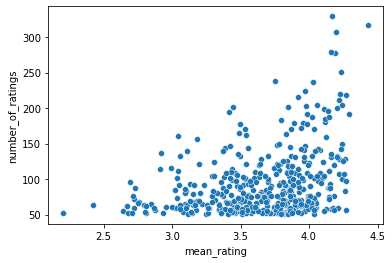

In [44]:
#visualising the correlation between average ratings and number of ratings
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='mean_rating',y='number_of_ratings', data=aggregated_ratings_50)

most movies have less than 150 number of ratings

most movies in the dataset has an average ratings of between 3-4


In [45]:
#merging our dataframe with the filtered data
df_50= pd.merge(merged_df,aggregated_ratings_50[['title']], on='title', how ='inner')
df_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41376 entries, 0 to 41375
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     41376 non-null  int64  
 1   movieId    41376 non-null  int64  
 2   rating     41376 non-null  float64
 3   timestamp  41376 non-null  int64  
 4   title      41376 non-null  object 
 5   genres     41376 non-null  object 
 6   year       41376 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.5+ MB


In [46]:
#Number of users
df_50.userId.nunique()

607

In [47]:
#Number of movies rated
df_50.movieId.nunique()

485

In [48]:
#Number of ratings
df_50.rating.nunique()

10

In [49]:
#list of unique ratings
sorted(df_50.rating.unique())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [50]:
#create user-movie matrix
matrix = df_50.pivot_table(index='title', columns ='userId', values='rating')
matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
12 Angry Men,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,5.0,NaN,3.0,NaN,4.5
28 Days Later,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,5.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,5.0,NaN,4.0


In [51]:
#data normalization
#we'll subtract average ratings of each movie from our matrix to get a mean centered cosine similarity.
#after nomalization we expect to get a negative value for rating below the average mean and positive values for above the mean average rating
normalized_matrix = matrix.subtract(matrix.mean(axis =1), axis =0)
normalized_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.527778,NaN,1.472222,NaN,NaN,NaN,NaN,NaN
12 Angry Men,NaN,NaN,NaN,0.846491,NaN,NaN,NaN,NaN,NaN,NaN,...,0.846491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey,NaN,NaN,NaN,NaN,NaN,NaN,0.105505,NaN,NaN,NaN,...,NaN,NaN,1.105505,NaN,NaN,1.105505,NaN,-0.894495,NaN,0.605505
28 Days Later,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.474138,NaN,1.025862
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.68125,...,NaN,NaN,NaN,NaN,-0.681250,NaN,NaN,1.318750,NaN,0.318750


In [52]:
#calculating the similarity score
#1. using pearson correlation
item_similarity = normalized_matrix.T.corr()
item_similarity.head()

title,10 Things I Hate About You,12 Angry Men,2001: A Space Odyssey,28 Days Later,300,"40-Year-Old Virgin, The",A.I. Artificial Intelligence,"Abyss, The",Ace Ventura: Pet Detective,Ace Ventura: When Nature Calls,...,Wild Wild West,Willy Wonka & the Chocolate Factory,"Wizard of Oz, The","Wolf of Wall Street, The",X-Men,X-Men: The Last Stand,X2: X-Men United,Young Frankenstein,Zombieland,Zoolander
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,1.000000,0.138029,-0.253516,0.107948,0.339416,0.164200,-0.594988,-3.814107e-01,-0.255057,-0.289758,...,0.191407,0.043010,-0.216664,0.725502,0.115256,0.109621,0.001423,0.443656,0.276340,-0.171146
12 Angry Men,0.138029,1.000000,0.020192,-0.009787,-0.315154,-0.003679,0.311501,-2.030856e-01,0.000846,0.278103,...,0.110922,0.211214,0.414787,0.245144,-0.309836,-0.002175,-0.387331,0.218060,0.137124,0.336515
2001: A Space Odyssey,-0.253516,0.020192,1.000000,0.048894,0.114073,0.313433,0.020369,-9.457229e-02,-0.036319,0.017644,...,-0.183708,0.087803,-0.016502,0.355364,-0.123862,0.116150,-0.098900,-0.014795,-0.463892,-0.372286
28 Days Later,0.107948,-0.009787,0.048894,1.000000,0.195523,0.648477,0.079585,3.539462e-17,-0.176399,-0.212558,...,-0.150651,0.171987,0.230005,0.462428,0.248323,0.098859,0.427635,0.106995,0.631143,0.216676
300,0.339416,-0.315154,0.114073,0.195523,1.000000,0.341233,0.177706,-3.771549e-01,0.267142,0.232495,...,0.091625,-0.208296,-0.389535,0.688245,0.160559,0.192747,0.347141,0.179883,0.313584,-0.128771


 The Pearson correlation coefficient ranges from -1 to 1, with 1 indicating a perfect positive correlation, -1 indicating a perfect negative correlation, and 0 indicating no correlation. In the context of movie recommendations, a positive correlation suggests that users who liked one movie are likely to like the other, while a negative correlation suggests the opposite.

Let's take an example from the table:

For "10 Things I Hate About You (1999)" and "12 Angry Men (1957)", the Pearson similarity coefficient is 0.0. This implies that there is no linear correlation between the user ratings for these two movies. It doesn't necessarily mean that users dislike one when they like the other; it simply suggests that there's no linear relationship between the ratings.

For "10 Things I Hate About You (1999)" and "2001: A Space Odyssey (1968)", the Pearson similarity coefficient is -0.253516. This negative value suggests a weak negative correlation. In the context of movie recommendations, it might indicate that users who liked "10 Things I Hate About You" are, on average, less likely to have liked "2001: A Space Odyssey," and vice versa.

In [53]:
#2. using cosine similarity
#NB cosine similarity does not take missing values so we have to drop the missing values before running the code
cosine_item_similarity = cosine_similarity(normalized_matrix.fillna(0))

cosine_item_similarity

array([[ 1.        , -0.01174745, -0.05679086, ...,  0.04744522,
         0.03846235, -0.0345159 ],
       [-0.01174745,  1.        ,  0.00248056, ...,  0.0209838 ,
         0.02745524,  0.02137179],
       [-0.05679086,  0.00248056,  1.        , ..., -0.00617574,
        -0.12685796, -0.10601816],
       ...,
       [ 0.04744522,  0.0209838 , -0.00617574, ...,  1.        ,
         0.0384687 ,  0.05630225],
       [ 0.03846235,  0.02745524, -0.12685796, ...,  0.0384687 ,
         1.        , -0.03608389],
       [-0.0345159 ,  0.02137179, -0.10601816, ...,  0.05630225,
        -0.03608389,  1.        ]])

A value close to 1 suggests high similarity between the corresponding items or entities.

A value close to -1 suggests high dissimilarity.

A value close to 0 suggests little or no similarity

predicting user's ratings for one movie

let's use user 601 and say the  movie 10 Things I Hate About You (1999)

step 1: create a list of movies user 601 has watched and rated

step 2: rank the similarities between the movies user 601  rated and the movie movie 10 Things I Hate About You

step 3: select top n movies and highest similarity scores

step 4: calculate the predicted rating using weighted average of the similarity score and the ratings from user 601

In [54]:
#sort the movie by ratings and remove all movies with missing ratings for user 601
user = 601
movie = '10 Things I Hate About You'
movies_watched = pd.DataFrame(normalized_matrix[user].dropna(axis =0, how = 'all').sort_values(ascending = False)).reset_index().rename(columns = {601:'rating'})
movies_watched.head()

,title,rating
0,Iron Man,1.199468
1,"Incredibles, The",1.164000
2,Ratatouille,1.131944
3,"Monsters, Inc.",1.128788
4,How to Train Your Dragon,1.056604


In [55]:
#next we will get the similarity score of the movies watched by user 601 with the movie 10 Things I Hate About You (1999)

movie_similarity_score = item_similarity[[movie]].reset_index().rename(columns={'10 Things I Hate About You':'similarity_score'})

# Rank the similarities between the movies user 601 rated and 10 Things I Hate About You (1999).
n = 5
movies_watched_similarity = pd.merge(left=movies_watched, 
                                            right=movie_similarity_score, 
                                            on='title', 
                                            how='inner')\
                                     .sort_values('similarity_score', ascending=False)[:5]

# Take a look at the User 601 watched movies with highest similarity
movies_watched_similarity

,title,rating,similarity_score
39,"Dark Knight Rises, The",0.506579,0.819413
34,"Wolf of Wall Street, The",0.583333,0.725502
6,Interstellar,1.006849,0.633030
4,How to Train Your Dragon,1.056604,0.523112
5,Finding Nemo,1.039007,0.500052


In [56]:
movie

'10 Things I Hate About You'

In [57]:
item_similarity

title,10 Things I Hate About You,12 Angry Men,2001: A Space Odyssey,28 Days Later,300,"40-Year-Old Virgin, The",A.I. Artificial Intelligence,"Abyss, The",Ace Ventura: Pet Detective,Ace Ventura: When Nature Calls,...,Wild Wild West,Willy Wonka & the Chocolate Factory,"Wizard of Oz, The","Wolf of Wall Street, The",X-Men,X-Men: The Last Stand,X2: X-Men United,Young Frankenstein,Zombieland,Zoolander
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,1.000000,0.138029,-0.253516,0.107948,0.339416,0.164200,-0.594988,-3.814107e-01,-0.255057,-0.289758,...,0.191407,0.043010,-0.216664,0.725502,0.115256,0.109621,0.001423,0.443656,0.276340,-0.171146
12 Angry Men,0.138029,1.000000,0.020192,-0.009787,-0.315154,-0.003679,0.311501,-2.030856e-01,0.000846,0.278103,...,0.110922,0.211214,0.414787,0.245144,-0.309836,-0.002175,-0.387331,0.218060,0.137124,0.336515
2001: A Space Odyssey,-0.253516,0.020192,1.000000,0.048894,0.114073,0.313433,0.020369,-9.457229e-02,-0.036319,0.017644,...,-0.183708,0.087803,-0.016502,0.355364,-0.123862,0.116150,-0.098900,-0.014795,-0.463892,-0.372286
28 Days Later,0.107948,-0.009787,0.048894,1.000000,0.195523,0.648477,0.079585,3.539462e-17,-0.176399,-0.212558,...,-0.150651,0.171987,0.230005,0.462428,0.248323,0.098859,0.427635,0.106995,0.631143,0.216676
300,0.339416,-0.315154,0.114073,0.195523,1.000000,0.341233,0.177706,-3.771549e-01,0.267142,0.232495,...,0.091625,-0.208296,-0.389535,0.688245,0.160559,0.192747,0.347141,0.179883,0.313584,-0.128771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X-Men: The Last Stand,0.109621,-0.002175,0.116150,0.098859,0.192747,0.009278,0.136464,-2.498460e-01,-0.070570,0.419176,...,0.356088,0.446168,-0.064277,0.465972,0.399509,1.000000,0.503715,0.314590,0.258928,0.331388
X2: X-Men United,0.001423,-0.387331,-0.098900,0.427635,0.347141,-0.070598,0.158041,3.694567e-01,0.150113,0.572036,...,0.233411,-0.068781,0.035735,0.577214,0.864201,0.503715,1.000000,-0.070002,0.305156,0.267611
Young Frankenstein,0.443656,0.218060,-0.014795,0.106995,0.179883,0.083587,0.322777,-2.313571e-01,-0.074710,0.304658,...,0.089577,0.168411,0.196405,0.067363,-0.166406,0.314590,-0.070002,1.000000,0.279523,0.313464


In [58]:
# Assuming movies_watched_similarity is your DataFrame
movies_watched_similarity.rename(columns={'601': 'rating'}, inplace=True)


In [59]:
movies_watched_similarity.head()

,title,rating,similarity_score
39,"Dark Knight Rises, The",0.506579,0.819413
34,"Wolf of Wall Street, The",0.583333,0.725502
6,Interstellar,1.006849,0.633030
4,How to Train Your Dragon,1.056604,0.523112
5,Finding Nemo,1.039007,0.500052


In [60]:
#next we will calculate the weighted average ratings and similarity which now becomes the predicted ratings for the movie 10 Things I Hate About You (1999)
# Calculate the predicted rating using weighted average of similarity scores and the ratings from user 60
predicted_rating = round(np.average(movies_watched_similarity['rating'],weights=movies_watched_similarity.similarity_score),3)
predicted_rating

0.796

In [61]:
 #Item-based recommendation function
def item_based_rec(user=60, number_of_similar_items=5, number_of_recommendations =3):
  import operator
  # Movies that the target user has not watched
  user_unwatched_movies = pd.DataFrame(normalized_matrix[user].isna()).reset_index()
  user_unwatched_movies = user_unwatched_movies[user_unwatched_movies[60]==True]['title'].values.tolist()

  # Movies that the target user has watched
  user_watched = pd.DataFrame(normalized_matrix[user].dropna(axis=0, how='all').sort_values(ascending=False)).reset_index().rename(columns={60:'rating'})
  
  # Dictionary to save the unwatched movie and predicted rating pair
  rating_prediction ={}  

  # Loop through unwatched movies          
  for picked_movie in user_unwatched_movies: 
    # Calculate the similarity score of the picked movie with other movies
      movie_similarity_score = item_similarity[[picked_movie]].reset_index().rename(columns={picked_movie:'similarity_score'})
    # Rank the similarities between the picked user watched movie and the picked unwatched movie.
      picked_userid_watched_similarity = pd.merge(left=user_watched, 
                                                right=movie_similarity_score, 
                                                on='title', 
                                                how='inner')\
                                        .sort_values('similarity_score', ascending=False)[:number_of_similar_items]
    # Calculate the predicted rating using weighted average of similarity scores and the ratings from user 601
      predicted_rating = round(np.average(picked_userid_watched_similarity['rating'], 
                                        weights=picked_userid_watched_similarity['similarity_score']), 3)
    # Save the predicted rating in the dictionary
      rating_prediction[picked_movie] = predicted_rating
    # Return the top recommended movies
  return sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:number_of_recommendations]

# Get recommendations
#recommended_movie = item_based_rec(user=601, number_of_similar_items=5, number_of_recommendations =10)
#recommended_movie
reco = item_based_rec(user=60, number_of_similar_items=5, number_of_recommendations =10)
reco

[('Johnny Mnemonic', 0.641),
 ('Rocky', 0.503),
 ('Gone in 60 Seconds', 0.48),
 ('Hunt for Red October, The', 0.471),
 ('Blood Diamond', 0.435),
 ('Tombstone', 0.427),
 ('Stargate', 0.414),
 ('Ace Ventura: Pet Detective', 0.41),
 ('High Fidelity', 0.396),
 ('Crouching Tiger, Hidden Dragon (Wo hu cang long)', 0.376)]

## Model Based Collaborative filtering

We will explore Model-based collaborative filtering which is a recommendation technique that learns latent representations of users and items from observed interactions. By decomposing the user-item interaction matrix, it captures underlying characteristics of users and items. Singular Value Decomposition (SVD) and Non-Negative Matrix Factorization will be used for this purpose.SVD captures latent factors through decomposition, while NMF ensures non-negativity in factor matrices.Evaluation will be done through rmse and cross validation.

## Single Value Decomponsition

In [62]:
# Install Surprise library if you haven't already
#!pip install scikit-surprise

from surprise import Dataset, Reader, accuracy
from surprise import SVD
from surprise.model_selection import train_test_split, cross_validate


# Load the dataset from pandas DataFrame
# include rating scale from 0.5 to 5.0
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']], reader)

#instantiate SVD and perform cross validation with 5-fold
model=SVD()
cv_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5,verbose=True )

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8712  0.8737  0.8792  0.8753  0.8697  0.8738  0.0033  
MAE (testset)     0.6687  0.6716  0.6752  0.6712  0.6700  0.6713  0.0022  
Fit time          6.27    6.55    8.31    7.21    7.03    7.07    0.70    
Test time         0.22    0.17    0.18    0.28    0.17    0.20    0.04    


Five-fold cross validation was performed and model evaluated on RMSE. A lower RMSE indicates better predictive performance as it signifies that the model predictions are close to the true ratings.

A value of 0.8738 suggests that, on average, the predicted ratings generated by the Singular Value Decomposition (SVD) model deviate by approximately 0.0033 from the true ratings in the dataset.

## Recommendations based on SVD

To generate recommendations using SVD,
a userID to whom which recommendations are to be made is taken an input.
SVD model is used to predicted rating for each movie which represent how much the user might like each movie.
The ratings are sorted in a descending order and recommendations is given to the user.


In [63]:
# Recommend movies for a specific user (user_id = 1 in this example)
user_id = 1
user_movies = merged_df[merged_df['userId'] == user_id]['movieId'].unique()

# Generate recommendations for the user
recommended_movies = []
for movie_id in merged_df['movieId'].unique():
    if movie_id not in user_movies:
        predicted_rating = model.predict(user_id, movie_id).est
        recommended_movies.append((movie_id, predicted_rating))

# Sort recommended movies by predicted rating
recommended_movies.sort(key=lambda x: x[1], reverse=True)

# Print top 10 recommended movies
for movie_id, predicted_rating in recommended_movies[:10]:
    movie_title = merged_df[merged_df['movieId'] == movie_id]['title'].iloc[0]
    print(f"Movie Title: {movie_title}, Movie ID: {movie_id}, Predicted Rating: {predicted_rating}")


Movie Title: Shawshank Redemption, The, Movie ID: 318, Predicted Rating: 5.0
Movie Title: Inception, Movie ID: 79132, Predicted Rating: 5.0
Movie Title: Wallace & Gromit: The Best of Aardman Animation, Movie ID: 720, Predicted Rating: 5.0
Movie Title: Patton, Movie ID: 1272, Predicted Rating: 5.0
Movie Title: Rear Window, Movie ID: 904, Predicted Rating: 5.0
Movie Title: Casablanca, Movie ID: 912, Predicted Rating: 5.0
Movie Title: Amadeus, Movie ID: 1225, Predicted Rating: 5.0
Movie Title: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb, Movie ID: 750, Predicted Rating: 5.0
Movie Title: Lord of the Rings: The Fellowship of the Ring, The, Movie ID: 4993, Predicted Rating: 5.0
Movie Title: Godfather, The, Movie ID: 858, Predicted Rating: 5.0


#### Hyperparameter tuning

In [64]:
from surprise.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_factors': [50, 100, 150], 'n_epochs': [20, 30, 40], 'lr_all': [0.001, 0.002, 0.005]}

# Instantiate SVD
model = SVD()

# Convert the dataset back to Surprise format
data = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']], reader)

# Perform grid search with cross-validation
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
grid_search.fit(data)

# Get best parameters
best_params = grid_search.best_params['rmse']

print("Best parameters:", best_params)

#getting rmse score
cv_results = grid_search.cv_results

# Extract RMSE values
rmse_values = cv_results['mean_test_rmse']

# Print RMSE values
print("RMSE values:", rmse_values)

Best parameters: {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005}
RMSE values: [0.89529574 0.88210466 0.87043352 0.8872106  0.87591911 0.87093647
 0.8817743  0.87324816 0.8779274  0.89734065 0.88422085 0.8742147
 0.8893438  0.87859305 0.87360228 0.88459987 0.87454151 0.87841216
 0.89930868 0.88594923 0.87628872 0.89128751 0.87981714 0.87608109
 0.88594205 0.87750498 0.87813658]



From the best parameters identified through grid search,  RMSE values obtained  ranged from approximately 0.87 to 0.89. we will proceed to train the model using the identified best parameters to optimize its performance in generating accurate predictions.

In [65]:
model = SVD(**best_params)
trainset = data.build_full_trainset()
model.fit(trainset)

# Get the list of all movies
all_movie_ids = merged_df['movieId'].unique()

# Generate top-10 movie recommendations for each user
top_n = {}
for uid in merged_df['userId'].unique():
    # Exclude movies already rated by the user
    user_movies_rated = merged_df.loc[merged_df['userId'] == uid, 'movieId']
    movies_to_predict = [mid for mid in all_movie_ids if mid not in user_movies_rated]
    
    # Predict ratings for movies not yet rated by the user
    predictions = [model.predict(uid, mid) for mid in movies_to_predict]
    
    # Sort predictions by estimated rating
    sorted_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)
    
    # Get top 10 movie recommendations
    top_n[uid] = [(pred.iid, pred.est) for pred in sorted_predictions[:10]]

# Print the top 10 recommendations for a specific user (change uid)
uid = 1
print(f"Top 10 movie recommendations for user {uid}:")
for rank, (movie_id, estimated_rating) in enumerate(top_n[uid], start=1):
    print(f"{rank}: Movie ID {movie_id} (Estimated Rating: {estimated_rating})")

Top 10 movie recommendations for user 1:
1: Movie ID 110 (Estimated Rating: 5.0)
2: Movie ID 260 (Estimated Rating: 5.0)
3: Movie ID 356 (Estimated Rating: 5.0)
4: Movie ID 527 (Estimated Rating: 5.0)
5: Movie ID 1196 (Estimated Rating: 5.0)
6: Movie ID 1210 (Estimated Rating: 5.0)
7: Movie ID 1213 (Estimated Rating: 5.0)
8: Movie ID 2542 (Estimated Rating: 5.0)
9: Movie ID 318 (Estimated Rating: 5.0)
10: Movie ID 1704 (Estimated Rating: 5.0)


The top ten movies after training the model have a predicted rating of 5.0 which is the highest rating of movies in our dataset

## Non- negative Matrix Factorization

This is a matrix Factorization technique that factors the user-item interaction matrix into non-negative matrices.

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9210  0.9233  0.9192  0.9251  0.9227  0.9222  0.0020  
MAE (testset)     0.7057  0.7098  0.7041  0.7084  0.7061  0.7068  0.0020  
Fit time          7.46    7.51    7.27    7.32    7.27    7.37    0.10    
Test time         0.14    0.12    0.13    0.21    0.13    0.15    0.03    
Cross-validation results: {'test_rmse': array([0.92095155, 0.92329716, 0.9191502 , 0.9250711 , 0.9226768 ]), 'test_mae': array([0.70574917, 0.70976874, 0.70412004, 0.70838512, 0.70610753]), 'fit_time': (7.457733869552612, 7.513674736022949, 7.272040367126465, 7.323749542236328, 7.27045464515686), 'test_time': (0.1419978141784668, 0.12499666213989258, 0.12900924682617188, 0.20799994468688965, 0.12900090217590332)}


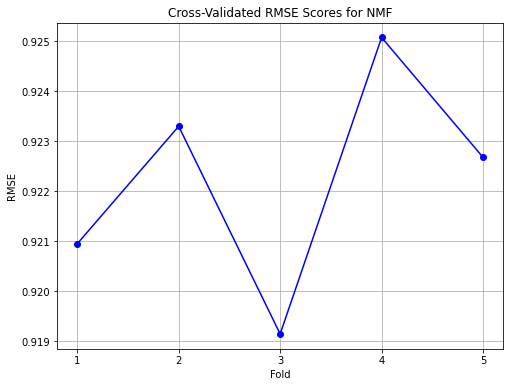

In [66]:
from surprise import NMF
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
# NMF algorithm
nmf = NMF()

# Perform cross-validation
cv_results = cross_validate(nmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Extract RMSE scores
rmse_scores = cv_results['test_rmse']

print("Cross-validation results:", cv_results)

# Plot RMSE scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), rmse_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validated RMSE Scores for NMF')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

From the plot above we see that the first and second fold have the lowest rmse while the third had the highest, then it drops again. But the margins are not too big to raise an alarm.

The cross validation results for the Non-Negative Matrix Factorization shows that RMSE mean across 5 folds is approximately 0.9222.A lower RMSE indicates better better performance of the algorithm. The algorithmn has a standard deviation of 0.0020 suggesting reliability in providing recommendation. There are also varying fit times averagely 7.37 and test times averagelt 0.15. This shows the computational efficiency of the NMF algorithm which should be considered in the system performance optimization.

Below, we will proceed and give movie recommendations to User_id 3 based on the ratings.

In [67]:
# getting a list of all movie ids
np.random.seed(42)
all_movie_ids=np.unique(merged_df['movieId'])
# predicted ratings for all movies in your dataset for use Id 3.
user_id = 3

# Create a list to store predicted ratings
predicted_ratings = []

for movie_id in all_movie_ids:
    predicted_rating = nmf.predict(user_id, movie_id).est
    predicted_ratings.append((movie_id, predicted_rating))
#sorting predicted_ratings in descending order
predicted_ratings.sort(key=lambda x:x[1], reverse=True)

In [68]:
# getting the top 5 recommendations
top_5_recommendations=predicted_ratings[:5]
top_5_recommendations

[(3326, 5.0),
 (5135, 5.0),
 (5181, 5.0),
 (6835, 5.0),
 (70946, 4.993688611010924)]

The above is top 5 recommendations based on user ratings.Let's proceed and get the movie titles to recommend to user ID 3,

In [69]:
for movie_id, predicted_rating in top_5_recommendations:
    movie_title = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
    print(f"Movie: {movie_title}, Predicted Rating: {predicted_rating}")

Movie: What Planet Are You From? (2000), Predicted Rating: 5.0
Movie: Monsoon Wedding (2001), Predicted Rating: 5.0
Movie: Hangar 18 (1980), Predicted Rating: 5.0
Movie: Alien Contamination (1980), Predicted Rating: 5.0
Movie: Troll 2 (1990), Predicted Rating: 4.993688611010924


Based on the NMF before tuning it the best recommendation to the third UserID is What Planet Are You From? (2000), Monsoon Wedding (2001),Hangar 18 (1980), Alien Contamination (1980) with a Predicted Rating: 5.0.

Next we going to investigate how the Non-Negative Matrix performs after tuning it. We will evaluate it using rmse and see the recommendations it gives.

### Grid Search on Non-Negative Matrix 

The RMSE of the NMF model before gridsearch is at 0.9222. We will try to apply grid search and train the model with the best parameters with the hope that it is going to improve the model.


In [70]:
# Convert the dataset back to Surprise format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']], reader)
np.random.seed(42)
#  parameter grid for grid search
param_grid = {'n_factors': [50, 100, 150],
              'n_epochs': [20, 30, 40],
              'biased': [True, False]} 

# Instantiate NMF
nmf = NMF()

# Perform grid search with cross-validation
grid_search = GridSearchCV(NMF, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
grid_search.fit(data)

# Get best parameters
best_params = grid_search.best_params['rmse']
print("Best parameters:", best_params)

#getting rmse score
cv_results = grid_search.cv_results

# Extract RMSE values
rmse_values = cv_results['mean_test_rmse']

# Print RMSE values
print("RMSE values:", rmse_values)

Best parameters: {'n_factors': 50, 'n_epochs': 40, 'biased': False}
RMSE values: [2.40550375 1.56926571 2.10047547 1.31058736 1.60184405 1.09165247
 1.69163793 1.70126299 1.74637489 1.49465532 1.7678024  1.23015766
 1.85723162 1.73116756 1.77967402 1.55802123 1.50410344 1.2960576 ]


From the grid search, the above were found to be the best parameters. We will then proceed and train the model using the best parameters.

In [71]:
np.random.seed(42)
# Train NMF model with best parameters
model = NMF(n_factors=best_params['n_factors'], 
            n_epochs=best_params['n_epochs'], 
            biased=best_params['biased'])
trainset = data.build_full_trainset()
model.fit(trainset)

# Get the list of all movie IDs
all_movie_ids = np.unique(merged_df['movieId'])

# Predict ratings for all movies for user ID 3
user_id = 3
predicted_ratings = []
for movie_id in all_movie_ids:
    predicted_rating = model.predict(user_id, movie_id).est
    predicted_ratings.append((movie_id, predicted_rating))

# Sort the predictions to find the top recommendations
predicted_ratings.sort(key=lambda x: x[1], reverse=True)
top_recommendations = predicted_ratings[:10]

# Display top recommendations for user ID 3
for i, (movie_id, predicted_rating) in enumerate(top_recommendations):
    movie_title = merged_df.loc[merged_df['movieId'] == movie_id, 'title'].iloc[0]
    print(f"Top {i+1}: {movie_title} (Predicted Rating: {predicted_rating})")

Top 1: Saturn 3 (Predicted Rating: 5.0)
Top 2: Piranha (Predicted Rating: 5.0)
Top 3: The Lair of the White Worm (Predicted Rating: 5.0)
Top 4: Hangar 18 (Predicted Rating: 5.0)
Top 5: Galaxy of Terror (Quest) (Predicted Rating: 5.0)
Top 6: Looker (Predicted Rating: 5.0)
Top 7: Android (Predicted Rating: 5.0)
Top 8: Alien Contamination (Predicted Rating: 5.0)
Top 9: Master of the Flying Guillotine (Du bi quan wang da po xue di zi) (Predicted Rating: 5.0)
Top 10: Death Race 2000 (Predicted Rating: 5.0)


For user_id 3 the best recommended movies based on Non-Negative Matrix Factorization models are Saturn 3  with (Predicted Rating: 5.0),Piranha (Predicted Rating: 5.0) The Lair of the White Worm  with (Predicted Rating: 5.0), Hangar 18 with (Predicted Rating: 5.0), Galaxy of Terror (Quest) (1981) (Predicted Rating: 5.0).

In [72]:
print(rmse_values.mean())

1.6354153035867727


The mean rmse mean from the grid search is 1.6354153035867727, which is quite higher from the rmse before doing the gridsearch. We had hoped that by applying grid search which adds complexity to our model, we will get better rmse scores but that is not the case.Let's apply deep learning on Matrix Factorization to see if our model improves.

## Deep Learning Matrix Facrorization

### Matrix Factorization with Embedding Layers

Matrix factorization with embeddings is a popular approach in recommendation systems to model user-item interactions. It aims to decompose the user-item interaction matrix into lower-dimensional embeddings for users and items (movies in this case). These embeddings capture latent features that represent users' preferences and items' characteristics. By learning these embeddings, the model can predict how users would rate unseen items, enabling personalized recommendations.

In this implementation, we'll use Keras, a deep learning library, to build a neural network model that incorporates matrix factorization with embeddings. The model will consist of embedding layers for users and items, followed by concatenation and dense layers. By training this model on a dataset of user-item interactions (user ratings for movies), we aim to learn meaningful representations of users and items that can accurately predict ratings for unseen user-item pairs.

By implementing matrix factorization with embeddings in combination with a neural network model, we aim to leverage the benefits of both approaches to improve the accuracy and effectiveness of our recommendation system.

We will start by splitting the dataset into features (user and movie IDs) and the target variable (ratings).

In [73]:
from sklearn.model_selection import train_test_split
# 'rating'becomes the target variable 'y'
y = merged_df['rating']

# 'userId' and 'movieId' are feature data 'X'
X = merged_df[['userId', 'movieId']]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Next, we calculate the number of unique users and movies to determine the dimensions of the embedding layers.

In [74]:
# the maximum user ID in the dataset and add 1 to account for 0-based indexing
num_users = merged_df['userId'].max() + 1

# the maximum movie ID in the dataset and add 1 to account for 0-based indexing
num_movies = merged_df['movieId'].max() + 1

Will then define our neural network model architecture for matrix factorization with embeddings using Keras. By first importing necessary modules from Keras to build and define the neural network model. Then set embedding dimension , a hyperparameter which represents the size of the embedding vectors. Two input layers will be defined for user and movie IDs. Each input layer will have a shape of (1,) because we are providing only one feature (user ID or movie ID) at a time.

Embedding layers are created for both user and movie IDs. These layers transform the input integers (user IDs and movie IDs) into dense vectors of fixed size (embedding_dim). The number of unique users and movies (num_users and num_movies) calculated previously is used to determine the size of the embedding layers.

The embedding vectors are flattened to convert them into 1D tensors. This step is necessary to concatenate the embeddings later in the model architecture. Then the flattened user and movie embeddings are concatenated along the feature axis to combine them into a single feature vector.

A dense hidden layer with 100 units and ReLU activation function will be added to the concatenated embeddings. The output layer will consist of a single neuron with linear activation function, which predicts the rating for a user-item pair.

Finally, the model will be created using the input and output layers defined earlier. This model takes user and movie IDs as input and outputs the predicted ratings.

In [75]:
from keras.layers import Input, Embedding, Flatten,Concatenate, Dense
from keras.models import Model
import tensorflow as tf
tf.random.set_seed(42)
# Define embedding dimensions
embedding_dim = 40

# Define input layers
user_input = Input(shape=(1,), name='User_Input')
movie_input = Input(shape=(1,), name='Movie_Input')

# Define embedding layers
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='User_Embedding')(user_input)
movie_embedding = Embedding(input_dim=num_movies, output_dim=embedding_dim, name='Movie_Embedding')(movie_input)

# Flatten the embeddings
user_flat = Flatten(name='User_Vector')(user_embedding)
movie_flat = Flatten(name='Movie_Vector')(movie_embedding)

# Concatenate user and movie embeddings
concatenated = Concatenate(name='Concatenate')([user_flat, movie_flat])

# Define your model's architecture
dense_layer = Dense(100, activation='relu', name='dense')(concatenated)
output_layer = Dense(1, activation='linear', name='Output')(dense_layer)

# Create the model
model = Model(inputs=[user_input, movie_input], outputs=output_layer)

We will then proceed to get the summary of our model. 

In [76]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
User_Input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Movie_Input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
User_Embedding (Embedding)      (None, 1, 40)        24440       User_Input[0][0]                 
__________________________________________________________________________________________________
Movie_Embedding (Embedding)     (None, 1, 40)        7744400     Movie_Input[0][0]                
_______________________________________________________________________________________

The summary provides a detailed summary of the model architecture, including the type of each layer, output shape, and the number of parameters as we see above.


Below, we will define a custom root mean squared error (RMSE) metric function using TensorFlow.Then compile the model with specified optimizer, loss function, and custom RMSE metric, this prepares the model for training. During training, the model will optimize its parameters (weights and biases) using the Adam optimizer to minimize the mean squared error loss, while also monitoring the RMSE metric to assess its performance on both the training and validation datasets.

In [77]:
import tensorflow as tf

# Custom RMSE metric function
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[rmse])


Next, we will train the neural network model (model) using the training data and evaluate its performance on the validation data. We will use epochs=20 which specifies the number of training epochs, i.e., the number of times the entire training dataset will be passed forward and backward through the neural network. batch_size=128 defines the number of samples per gradient update. The model's parameters are updated after processing each batch of data. We train the neural network model using the specified training data and evaluate its performance on the validation data over a fixed number of epochs. The model's parameters will be optimized using the training data and the specified loss function, and its performance will be monitored using the custom RMSE metric.

In [78]:
history = model.fit(
    [X_train['userId'].values, X_train['movieId'].values],  # Input data for User and Movie IDs
    y_train ,  # Target values (ratings)
    epochs=20,  # Number of training epochs 
    batch_size=128,  # Batch size for training 
    validation_data=([X_val['userId'].values, X_val['movieId'].values], y_val)  # Validation data
)

Epoch 1/20
631/631 [==============================] - 49s 78ms/step - loss: 1.8256 - rmse: 1.1682 - val_loss: 0.7869 - val_rmse: 0.8844
Epoch 2/20
631/631 [==============================] - 54s 86ms/step - loss: 0.7348 - rmse: 0.8544 - val_loss: 0.7713 - val_rmse: 0.8754
Epoch 3/20
631/631 [==============================] - 50s 80ms/step - loss: 0.6996 - rmse: 0.8337 - val_loss: 0.7706 - val_rmse: 0.8748
Epoch 4/20
631/631 [==============================] - 50s 79ms/step - loss: 0.6703 - rmse: 0.8161 - val_loss: 0.7517 - val_rmse: 0.8640
Epoch 5/20
631/631 [==============================] - 50s 79ms/step - loss: 0.6460 - rmse: 0.8010 - val_loss: 0.7512 - val_rmse: 0.8636
Epoch 6/20
631/631 [==============================] - 51s 81ms/step - loss: 0.6275 - rmse: 0.7895 - val_loss: 0.7480 - val_rmse: 0.8619
Epoch 7/20
631/631 [==============================] - 53s 84ms/step - loss: 0.6119 - rmse: 0.7799 - val_loss: 0.7638 - val_rmse: 0.8710
Epoch 8/20
631/631 [============================

We will focus on the val_rmse, as it indicates the model's performance on unseen data. During training the rmse decreases after each epoch but for the validation RMSE there is a fluctuation in their performance after each training epoch.

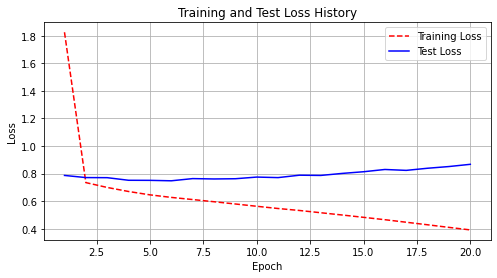

In [79]:
# training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize=(8, 4))
plt.plot(epoch_count, training_loss, 'r--', label='Training Loss')
plt.plot(epoch_count, test_loss, 'b-', label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss History')
plt.grid(True)
plt.show()

Our model has an RMSE of 0.9282 which is a slight improvement from the NMF before tuning and a slighter more improvement from our model after applying hyperparameter tuning. However, from the plot above, we note the discrepancy between the training and testing losses which indicates that the model's performance might be deteriorating on unseen data despite improving on the training data. This discrepancy is a typical indicator of potential overfitting, and it suggests that the model may benefit from regularization techniques or architectural adjustments to improve its generalization ability.




Next we will retrieve the predicted ratings for user ID 3 for all movies and then identify the top recommendations based on these predicted ratings

In [80]:
# Get predicted ratings for user ID 3 and all movies
user_id = 3
all_movie_ids = np.unique(ratings_df['movieId'])
predicted_ratings = []

for movie_id in all_movie_ids:
    predicted_rating = model.predict([np.array([user_id]), np.array([movie_id])])[0][0]
    # Clip the predicted rating to the range of 0.5 to 5.0
    predicted_rating = max(0.5, min(predicted_rating, 5.0))
    predicted_ratings.append((movie_id, predicted_rating))

# Sort the predicted ratings to find top recommendations
predicted_ratings.sort(key=lambda x: x[1], reverse=True)
top_recommendations = predicted_ratings[:10]

# Print top recommendations
for i, (movie_id, predicted_rating) in enumerate(top_recommendations):
    movie_title = movies_df.loc[movies_df['movieId'] == movie_id, 'title'].iloc[0]
    print(f"Top {i+1}: {movie_title} (Predicted Rating: {predicted_rating})")


Top 1: Bossa Nova (2000) (Predicted Rating: 5.0)
Top 2: Road Warrior, The (Mad Max 2) (1981) (Predicted Rating: 5.0)
Top 3: The Lair of the White Worm (1988) (Predicted Rating: 5.0)
Top 4: Hangar 18 (1980) (Predicted Rating: 5.0)
Top 5: Android (1982) (Predicted Rating: 5.0)
Top 6: Alien Contamination (1980) (Predicted Rating: 5.0)
Top 7: Enemy Mine (1985) (Predicted Rating: 5.0)
Top 8: Harry Potter and the Prisoner of Azkaban (2004) (Predicted Rating: 5.0)
Top 9: Clonus Horror, The (1979) (Predicted Rating: 5.0)
Top 10: Harry Potter and the Goblet of Fire (2005) (Predicted Rating: 5.0)


These are the top 10 movie recommendations for user ID 3, sorted based on the predicted ratings. The predicted ratings are numerical values representing the model's estimate of how much the user would enjoy each movie.
The higher the predicted rating, the more likely the user is to enjoy the movie according to the model.
These recommendations are personalized for user ID 3 and are based on the user's interactions with other movies and the model's learned patterns from the dataset.

# Conclusions
## Memory based collaborative filtering
### User-based
The model successfully identified similar users based on Pearson correlation coefficients and utilized their preferences to make personalized recommendations. The predicted ratings for the recommended movies are based on weighted averages of similar users' ratings.
The recommended movies have predicted ratings higher than the user's average rating, indicating potential interest. This suggests that the model is effective in recommending items that align with the user's preferences.

### Item-based

The recommendation system effectively predicts ratings for unwatched movies based on similarities with movies the user has already watched.

Utilizing  Pearson correlation, the model accurately identifies similar movies and provides relevant recommendations.

## Model Based Recommendation system

### Single Value Decomposion
Achieved an average Root Mean Squared Error (RMSE) of 0.8738 with a standard deviation of 0.0033 across 5-fold cross-validation.
Demonstrated reliable predictive performance with low RMSE, indicating that the model's predictions were close to the true ratings.

### Non-Negative Matrix Factorization (NMF):

Obtained an average RMSE of 0.9222 with a standard deviation of 0.0020 through 5-fold cross-validation.
Showed slightly higher RMSE compared to SVD, but still provided reasonable predictive performance.
### Hyperparameter Tuning:

Conducted grid search for both SVD and NMF to optimize model performance.
Identified the best parameters for each model, with SVD having parameters: {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005}, and NMF having parameters: {'n_factors': 50, 'n_epochs': 40, 'biased': False}.
However, despite parameter tuning, NMF did not show significant improvement in RMSE compared to the initial model.

### Deep Learning Matrix Factorization with Embeddings:

RMSE: 0.9282

The deep learning approach combines matrix factorization with neural networks and embeddings to capture complex patterns in user-item interactions. It achieved an RMSE of 0.9282, slightly higher than both SVD and NMF.

#### Summary
Based solely on the RMSE values, SVD performed the best among the three methods, followed by NMF and then the deep learning approach. However, it's essential to consider other factors such as scalability, computational efficiency, and potential for further improvement. The deep learning approach offers flexibility and the potential to capture more complex relationships but may require more computational resources and tuning to outperform traditional methods like SVD and NMF.

# Recommendations based on our findings:
**For New Users:**

For users who do not have any interaction history, use popular item recommendations or content-based filtering methods until they provide enough explicit feedback for personalized recommendations.

**For Active Users:**

Utilize collaborative filtering methods (user-item or item-item) to recommend items based on their past interactions and preferences.

**For Advanced Personalization:**

Employ model-based recommendations (SVD, NMF, or deep learning with embeddings) to provide more personalized recommendations based on the latent factors learned from user-item interactions.
By combining memory-based and model-based approaches, you can leverage the strengths of both to deliver accurate and diverse recommendations tailored to the needs and preferences of users. Additionally, considering hybrid recommendation systems that combine multiple algorithms can further enhance recommendation quality and robustness.


# Recommendations for further improvements

Gather Feedback: Collect user feedback on recommendations to continuously refine the algorithms. Understanding user preferences and reactions to recommendations can provide valuable insights for improving recommendation accuracy and relevance.

Conduct A/B Testing: Evaluate recommendation changes through A/B testing to measure their impact on user engagement and satisfaction. Testing different algorithms, parameters, or recommendation strategies in controlled experiments can help identify the most effective approaches.

Optimize Scalability: Ensure the recommendation system can efficiently handle growing datasets and user bases. Implement scalable architectures and algorithms to maintain performance and responsiveness as the system's workload increases over time.

Enhance Personalization: Consider incorporating additional user and item features, such as movie profiles and diverse movie choices, to enhance personalization. By capturing more nuanced aspects of user preferences and item characteristics, the recommendation system can deliver more tailored and relevant recommendations.